 **IGTI - Machine Learning 2nd Week Challenge - Bike Sharing Dataset**

**Libraries**

some additional ones will be imported later


In [47]:
from google.colab import files
import pandas as pd
from sklearn.metrics import r2_score

**Uploading the dataset**

In [48]:
from google.colab import files
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (1).csv


**Creating the data frame**

In [49]:
df = pd.read_csv('comp_bikes_mod.csv', sep = ',')

**Getting to know the data frame**

In [50]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [51]:
instances, attributes = df.shape
print(f"The data frame has {instances} instances and {attributes} attributes")

The data frame has 17379 instances and 17 attributes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [53]:
temp_null_percentage = 100 - (15641 * 100 / 17379)
print(f"Percatange of the 'temp' attribute null data {temp_null_percentage}")

Percatange of the 'temp' attribute null data 10.000575407100527


**Handling null data**

removing null instances for the 'dteday' attribute

In [54]:
df = df[df['dteday'].notna()]

In [55]:
instances, attributes = df.shape
print(f"Now, the data frame has {instances} instances and {attributes} attributes")

Now, the data frame has 15641 instances and 17 attributes


In [56]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


**Getting the 'temp' (temperature) attribute mean**

In [57]:
print(f'Temperature mean is: {df["temp"].mean()}')

Temperature mean is: 0.4969259206597582


**Some data frame statistics**

In [58]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Turning *season* into a categorical class**

In [59]:
df = pd.get_dummies(df, columns = ['season'])

In [60]:
df.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1.0,season_2.0,season_3.0,season_4.0
count,14060.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8679.717496,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850,0.219743,0.225241,0.231635,0.222364
std,5015.960092,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589,0.414086,0.417755,0.421890,0.415848
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4336.250000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,8677.500000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000,0.000000,0.000000,0.000000,0.000000
75%,13024.250000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000,0.000000,0.000000,0.000000,0.000000
max,17376.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000


Turning *dteday* into a **DateTime** instance

In [61]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [62]:
df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1.0,season_2.0,season_3.0,season_4.0
1,2.0,2011-01-01,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1,0,0,0
2,3.0,2011-01-01,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,1,0,0,0
3,4.0,2011-01-01,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1,0,0,0
4,5.0,2011-01-01,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1,0,0,0
5,6.0,2011-01-01,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1,0,0,0


Boxplot **windspeed**

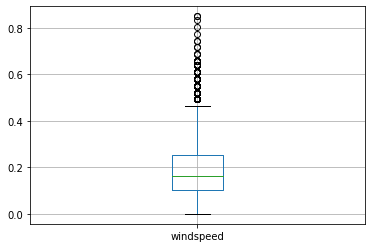

In [63]:
df.boxplot(['windspeed'])

**Correlation Matrix**

In [64]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1.0,season_2.0,season_3.0,season_4.0
instant,1.000000,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132,-0.257040,-0.151431,0.093086,0.314639
yr,0.866207,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729,0.005226,-0.003048,-0.000705,-0.004576
mnth,0.488959,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162,-0.523680,-0.296224,0.183369,0.644504
hr,-0.008643,-0.006261,-0.005681,1.000000,0.009332,-0.010738,-0.003002,-0.023388,0.142102,0.136946,-0.277403,0.140474,0.303261,0.371388,0.391391,0.007272,-0.008279,-0.002945,-0.002476
holiday,0.014597,0.007763,0.021196,0.009332,1.000000,-0.099102,-0.250450,-0.018945,-0.031273,-0.037606,-0.008809,0.008267,0.014519,-0.050193,-0.036150,0.025565,-0.021400,-0.028137,0.016913
weekday,-0.001126,-0.008526,0.018991,-0.010738,-0.099102,1.000000,0.038821,0.004393,-0.004478,-0.011512,-0.035510,0.011014,0.025301,0.020142,0.021396,-0.003442,-0.012025,0.011531,-0.002164
workingday,-0.010626,-0.000958,-0.004235,-0.003002,-0.250450,0.038821,1.000000,0.050468,0.053113,0.055287,0.017469,-0.010926,-0.300811,0.130360,0.028170,-0.025653,0.021040,0.017907,-0.006029
weathersit,-0.020270,-0.026142,0.002774,-0.023388,-0.018945,0.004393,0.050468,1.000000,-0.101245,-0.105254,0.418574,0.025729,-0.152335,-0.118396,-0.141622,0.029427,0.010770,-0.085228,0.040563
temp,0.141681,0.040857,0.202203,0.142102,-0.031273,-0.004478,0.053113,-0.101245,1.000000,0.988102,-0.069887,-0.016022,0.458735,0.329653,0.405867,-0.543439,0.133852,0.595988,-0.201531
atemp,0.141808,0.037290,0.210337,0.136946,-0.037606,-0.011512,0.055287,-0.105254,0.988102,1.000000,-0.054224,-0.058803,0.452364,0.329114,0.403810,-0.547948,0.142245,0.576273,-0.183502


**Filling NaN data for *hum, cnt, casual***

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   yr          14076 non-null  float64       
 3   mnth        14062 non-null  float64       
 4   hr          14068 non-null  float64       
 5   holiday     14076 non-null  float64       
 6   weekday     14078 non-null  float64       
 7   workingday  14097 non-null  float64       
 8   weathersit  14078 non-null  float64       
 9   temp        14066 non-null  float64       
 10  atemp       14076 non-null  float64       
 11  hum         14070 non-null  float64       
 12  windspeed   14082 non-null  float64       
 13  casual      14071 non-null  float64       
 14  registered  14090 non-null  float64       
 15  cnt         14079 non-null  float64       
 16  season_1.0  15641 non-

In [66]:
df["hum"].fillna(df["hum"].mean(), inplace=True)

In [67]:
df["cnt"].fillna(df["cnt"].mean(), inplace=True)

In [68]:
df["casual"].fillna(df["casual"].mean(), inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   yr          14076 non-null  float64       
 3   mnth        14062 non-null  float64       
 4   hr          14068 non-null  float64       
 5   holiday     14076 non-null  float64       
 6   weekday     14078 non-null  float64       
 7   workingday  14097 non-null  float64       
 8   weathersit  14078 non-null  float64       
 9   temp        14066 non-null  float64       
 10  atemp       14076 non-null  float64       
 11  hum         15641 non-null  float64       
 12  windspeed   14082 non-null  float64       
 13  casual      15641 non-null  float64       
 14  registered  14090 non-null  float64       
 15  cnt         15641 non-null  float64       
 16  season_1.0  15641 non-

**Linear Regression** - X = *hum, casual* - Y = *cnt*

In [70]:
from sklearn.linear_model import LinearRegression

X = df[['hum','casual']]
y= df['cnt'].values

reg = LinearRegression()
reg.fit(X, y)

prediction =reg.predict(X)

r2 = r2_score(y, prediction)

print(f"Y = {reg.coef_}, X = {reg.intercept_}")
print("Coefficient of determination (R2):", r2)

Y = [-99.75012328   2.21512197], X = 173.29337505135578
Coefficient of determination (R2): 0.4059859251122173


**Decision Tree Regression**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

tree_prediction = tree_reg.predict(X)

tree_r2 = r2_score(y, tree_prediction)

print("Coefficient of determination (R2):", tree_r2)

Coefficient of determination (R2): 0.7098339715834964
